# Access to public services and their impact on ICFES scores

## Introduction

**Context.**  The ICFES (*Colombian Institute for the Evaluation of Education*) conducts biannual exams for the eleventh grade school population. The results obtained in these exams are of great interest to the country. These results make it possible to establish a self-evaluation of the education provided and of the assets allocated for this purpose. Generally, studies in this problematic specialize in the **micro-social components** of the members to try to give an explanation to the results obtained (Chica Gómez et al. 2010, Herrera Salazar, V. 2017, Moncayo Cabrera, M. A. 2016, Sánchez, Y. A. 2017). However, for the nation and municipalities **looking from a broader spectrum, a macro evaluation of the elements** related to the results of these exams could be of greater use if the studies conducted covered issues of Internet access and public services. 

**Problem.** We want to identify the impact of access to public services on the performance of municipalities in the department of Cundinamarca in ICFES results. 

For this, we format the downloaded data, analyze relationships between ICFES scores and levels of access to different public services, and provide visualizations and first conclusions.

**Analytical Context.**  We downloaded the data from different sources, and it was stored in *.pikcle* which contains details about performance on the ICFES and indicators of access to public services of the municipalities such as: Internet, Aqueduct, Sewerage, Energy, Gas, ICFES score values, etc. 

The following tasks were performed with the data:

1. Data engineering (Extraction, Transform and Load data).
2. Reading, transforming and preparing the data for visualization.
3. Perform analysis and build visualizations of the data to identify patterns in the data set.
        
With the find e give answers to some questions we would like to get answers to. 

1. Is there a direct relationship between access to public services and ICFES score? Which services have the greatest impact?
2. What interesting relationships exist between the variables? 
3. What can we conclude?


## Modules

In [1]:
import matplotlib.pyplot     as plt
import plotly.express        as px
import seaborn               as sns
import os
import pandas                as pd
import json
import numpy                 as np
import glob
import pickle
import re
import warnings
warnings.filterwarnings("ignore")
import pingouin              as pg

##  Fetching the relevant data
### ETL - Extract, Transform & Load Data
The data sets used, are: The results for the ICFES test between the period 2019 to 2021, the internet access from MINTIC (*Ministerio de Tecnologías de la Información y las Comunicaciones de Colombia*) reported for the municipalities of Cundinamarca from 2019 until 2022, and finally the information of SUI (*Sistema Único de Información de Servicios Públicos]*) from 2019 to 2021.

#### Load raw data

* ICFES

In [84]:
# Obtain the list of variables
list_files = glob.glob("C:/Users/Braya/OneDrive/Documentos/DS4A/ICFES/*.txt")
#Create function to make specific etl on ICFES files
def etl_icfes(x):

    """
    Apply an ETL process over ICFES data list

    Arguments:

        x: List of paths got from use glob.glob("C:/PATH/*.txt")

    Returns:

        df: data_frame with ETL process done and summary statistics by Cundinarmaca
            municipe

    """

    def q25(x):
        return x.quantile(0.25) #functions to get quantils

    def q75(x):
        return x.quantile(0.75)

    column_names = ['PERIODO','ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE',
    'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
    'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'COLE_CODIGO_ICFES',
    'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_NOMBRE_ESTABLECIMIENTO',
    'COLE_COD_MCPIO_UBICACION','COLE_MCPIO_UBICACION', 'COLE_COD_DEPTO_UBICACION',
    'COLE_DEPTO_UBICACION', 'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_MCPIO_PRESENTACION',
    'ESTU_DEPTO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION','PUNT_LECTURA_CRITICA',
    'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS',
    'PUNT_INGLES', 'DESEMP_INGLES', 'PUNT_GLOBAL'] # Starting variables filter

    df = pd.DataFrame(columns=column_names) # Create an empty dataframe

    list_files = x # Assign the list of files to a variable


    for i in range(0, len(list_files)): # For loop to concat dataframes
        temp0 = pd.read_table(list_files[i], sep='¬') # read data for specific period
        temp0 = temp0.filter(items=column_names) # use filter to get specific columns
        temp0 = temp0[temp0['ESTU_COD_RESIDE_DEPTO'] == 25] # Take only Cundinamarca
        temp0['PERIODO'] = temp0['PERIODO'].astype(str).str[0:4] # Transform period to Anual
        df = pd.concat([df, temp0]) # concat dataframes
    
    df = df.groupby(['PERIODO','ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO']).agg( #Calculate summary statistics by Cundinamarca
        PUNT_LECTURA_CRITICA_MIN = ('PUNT_LECTURA_CRITICA', 'min'),
        PUNT_LECTURA_CRITICA_Q25 = ('PUNT_LECTURA_CRITICA', q25),
        PUNT_LECTURA_CRITICA_MEAN = ('PUNT_LECTURA_CRITICA', 'mean'),
        PUNT_LECTURA_CRITICA_MEDIAN = ('PUNT_LECTURA_CRITICA', 'median'),
        PUNT_LECTURA_CRITICA_Q75 = ('PUNT_LECTURA_CRITICA', q75),
        PUNT_LECTURA_CRITICA_MAX = ('PUNT_LECTURA_CRITICA', 'max'),
        PUNT_LECTURA_CRITICA_STD = ('PUNT_LECTURA_CRITICA', 'std'),
        PUNT_MATEMATICAS_MIN = ('PUNT_MATEMATICAS', 'min'),
        PUNT_MATEMATICAS_Q25 = ('PUNT_MATEMATICAS', q25),
        PUNT_MATEMATICAS_MEAN = ('PUNT_MATEMATICAS', 'mean'),
        PUNT_MATEMATICAS_MEDIAN = ('PUNT_MATEMATICAS', 'median'),
        PUNT_MATEMATICAS_Q75 = ('PUNT_MATEMATICAS', q75),
        PUNT_MATEMATICAS_MAX = ('PUNT_MATEMATICAS', 'max'),
        PUNT_MATEMATICAS_STD = ('PUNT_MATEMATICAS', 'std'),
        PUNT_C_NATURALES_MIN = ('PUNT_C_NATURALES', 'min'),
        PUNT_C_NATURALES_Q25 = ('PUNT_C_NATURALES', q25),
        PUNT_C_NATURALES_MEAN = ('PUNT_C_NATURALES', 'mean'),
        PUNT_C_NATURALES_MEDIAN = ('PUNT_C_NATURALES', 'median'),
        PUNT_C_NATURALES_Q75 = ('PUNT_C_NATURALES', q75),
        PUNT_C_NATURALES_MAX = ('PUNT_C_NATURALES', 'max'),
        PUNT_C_NATURALES_STD = ('PUNT_C_NATURALES', 'std'),
        PUNT_SOCIALES_CIUDADANAS_MIN = ('PUNT_SOCIALES_CIUDADANAS', 'min'),
        PUNT_SOCIALES_CIUDADANAS_Q25 = ('PUNT_SOCIALES_CIUDADANAS', q25),
        PUNT_SOCIALES_CIUDADANAS_MEAN = ('PUNT_SOCIALES_CIUDADANAS', 'mean'),
        PUNT_SOCIALES_CIUDADANAS_MEDIAN = ('PUNT_SOCIALES_CIUDADANAS', 'median'),
        PUNT_SOCIALES_CIUDADANAS_Q75 = ('PUNT_SOCIALES_CIUDADANAS', q75),
        PUNT_SOCIALES_CIUDADANAS_MAX = ('PUNT_SOCIALES_CIUDADANAS', 'max'),
        PUNT_SOCIALES_CIUDADANAS_STD = ('PUNT_SOCIALES_CIUDADANAS', 'std'),
        PUNT_INGLES_MIN = ('PUNT_INGLES', 'min'),
        PUNT_INGLES_Q25 = ('PUNT_INGLES', q25),
        PUNT_INGLES_MEAN = ('PUNT_INGLES', 'mean'),
        PUNT_INGLES_MEDIAN = ('PUNT_INGLES', 'median'),
        PUNT_INGLES_Q75 = ('PUNT_INGLES', q75),
        PUNT_INGLES_MAX = ('PUNT_INGLES', 'max'),
        PUNT_INGLES_STD = ('PUNT_INGLES', 'std'),
        PUNT_GLOBAL_MIN = ('PUNT_GLOBAL', 'min'),
        PUNT_GLOBAL_Q25 = ('PUNT_GLOBAL', q25),
        PUNT_GLOBAL_MEAN = ('PUNT_GLOBAL', 'mean'),
        PUNT_GLOBAL_MEDIAN = ('PUNT_GLOBAL', 'median'),
        PUNT_GLOBAL_Q75 = ('PUNT_GLOBAL', q75),
        PUNT_GLOBAL_MAX = ('PUNT_GLOBAL', 'max'),
        PUNT_GLOBAL_STD = ('PUNT_GLOBAL', 'std')).reset_index() # Final aggregation with resume of summary statistics for Cundinamarca

    return df
#Apply function and obtain summary data from ICFES
etl_result_icfes = etl_icfes(list_files)

* MINTIC - Internet penetration

In [85]:
# Obtain the list of variables
list_files = glob.glob("C:/Users/Braya/OneDrive/Documentos/DS4A/MINTIC/*.csv")
#Create specific etl for MINTIC files
data_mintic = pd.read_csv(list_files[0], encoding='latin-1') # Read file
data_mintic = data_mintic[data_mintic['COD_DEPARTAMENTO'] == 25] # Filter data by Cundinamarca
data_mintic = data_mintic.groupby(['ANO', 'COD_MUNICIPIO', 'MUNICIPIO']).agg( # Get DANE population, points an percentage of internet access
    ACCESOS_FIJOS = ('NO ACCESOS FIJOS A INTERNET',  'max'),
    POBLACION = ('POBLACION DANE', 'max'),
    INDICADOR_INTERNET = ('INDICE', 'max')).reset_index()


* SUI - Services Penetration

In [86]:
# Obtain the list of variables
list_files = glob.glob("C:/Users/Braya/OneDrive/Documentos/DS4A/SUI/*.xlsx")
#Create function to make specific etl on SUI files
def etl_sui(x):
    """
    Apply an ETL process over SUI data list

    Arguments:

        x: List of paths got from use glob.glob("C:/PATH/*.xlsx")

    Returns:

        df: data_frame with ETL process done and summary statistics by Cundinarmaca
            municipe and each service

    """
    df = pd.DataFrame(columns=['MUNICIPIO', 'USO', 'ANO', 'MES', 'N_SUBS', 'ETIQUETA']) # Empty df to storage

    for i in range(0, len(x)): # For loop by file
        data_sui = pd.read_excel(list_files[i]) # Reading phase
        data_sui = data_sui.drop_duplicates(subset=['MUNICIPIO','AÑO']) #drop duplicates
        data_sui.columns = ['MUNICIPIO', 'USO', 'ANO', 'MES', 'N_SUBS'] # rename columns
        data_sui['ETIQUETA'] = re.sub(r'[^a-zA-Z]', '', re.search('C:/Users/Braya/OneDrive/Documentos/DS4A/SUI(.*).xlsx',x[i]).group(1)) # Create label
        df = pd.concat([df, data_sui], ignore_index=True) # Concatenate DFS
    
    df = df.pivot(columns='ETIQUETA', index=['MUNICIPIO', 'ANO'], values='N_SUBS') # generate pivot
    df = df.reset_index() # restore columns and their respective names

    return df
# Apply function and obtain summary data from SUI
etl_results_sui = etl_sui(list_files)

* Spatial distances

We calculated distances from each municipalitie to Bogotá using QGIS program, and export as csv file. So, now we gonna load and merge it.

In [87]:
# Obtain the list of variables
list_files = glob.glob("C:/Users/Braya/OneDrive/Documentos/DS4A/Cundi_Map/*.csv")
#Create specific etl for MINTIC files
data_dist = pd.read_csv(list_files[0], encoding='utf-8') # Read file

#### Merge Data

In [88]:
# Join data by municipality and period
df_final = data_mintic.merge(etl_results_sui, on = ['MUNICIPIO', 'ANO'], how='outer') # Join data by municipality and period
etl_result_icfes = etl_result_icfes.drop('ESTU_MCPIO_RESIDE', 1) # Drop repeated column
etl_result_icfes['PERIODO'] = etl_result_icfes['PERIODO'].astype(int) # Convert period to int
etl_result_icfes['ESTU_COD_RESIDE_MCPIO'] = etl_result_icfes['ESTU_COD_RESIDE_MCPIO'].astype(int) # Convert municipality code to int

In [89]:
# Modifications to the database
df_final = df_final.merge(etl_result_icfes, left_on=['ANO', 'COD_MUNICIPIO'], right_on=['PERIODO', 'ESTU_COD_RESIDE_MCPIO'], how='outer') # Join data by municipality and period
del [etl_result_icfes, etl_results_sui, data_mintic] # Delete dfs
df_final['INDICADOR_ACUEDUCTO'] = df_final['Acueducto'].astype('Int64').divide(df_final['POBLACION'], fill_value = -1) # Calculate percentage of acueducto access
df_final['INDICADOR_ALCANTARILLADO'] = df_final['Alcantarillado'].astype('Int64').divide(df_final['POBLACION'], fill_value = -1) # Calculate percentage of alcantarillado access
df_final['INDICADOR_ENERGIA_ELECTRICA'] = df_final['Energiaelectrica'].astype('Int64').divide(df_final['POBLACION'], fill_value = -1) # Calculate percentage of energia electrica access
df_final['INDICADOR_GAS_NATURAL'] = df_final['Gasnatural'].astype('Int64').divide(df_final['POBLACION'], fill_value = -1) # Calculate percentage of gas natural access

In [90]:
df_final = df_final.merge(data_dist, left_on=['COD_MUNICIPIO'], right_on=['MPIO_CCDGO'], how='outer') # Join data by municipality and period
df_final = df_final.drop(['MPIO_CCDGO', 'MPIO_CNMBR'], 1) # Drop repeated column

In [93]:

indicators_list = ['INDICADOR_INTERNET', 'INDICADOR_ACUEDUCTO', 'INDICADOR_ALCANTARILLADO', 'INDICADOR_ENERGIA_ELECTRICA', 'INDICADOR_GAS_NATURAL']
df_final = df_final[df_final['ANO'] < 2021] # Filter data by period

for i in indicators_list: # For loop by indicators to replace weird values
    df_final.loc[(df_final[i] < 0, i)] = np.nan # Replace negative values with nan
    df_final.loc[(df_final[i] > 2, i)] = np.nan # Replace values greater than 2 with nan
    df_final.loc[(df_final[i] > 1, i)] = 1 # Replace values greater than 1 with 1

#Export data in pickle format
os.getcwd()
with open('consolidado_datos.pickle', 'wb') as f:
    pickle.dump(df_final, f)

In [94]:
os.getcwd()

'c:\\Users\\Braya\\OneDrive\\Documentos\\DS4A'

**Notes**: Why were changes made to the database?

Because some data in 2021 is erroneous, more specifically SUI does not report updated information. Therefore, 2021 is outdated.

On the other hand, some 2019 and 2020 data were over-reported and are evidence of typing errors. For this reason we adapt such errors to np.nan or 1. Also np.nan was set when the percentage indicators exceeded 200% and set 1 when they slightly exceeded 100%.

#### Loading dataset

In [2]:
#Open the.pickle file
with open('consolidado_datos.pickle', 'rb') as f:
    loaded_obj = pickle.load(f)

## Overview of the data

Let's go through the columns present in the DataFrame

In [96]:
loaded_obj.head()

ANO  COD_MUNICIPIO     MUNICIPIO  ACCESOS_FIJOS  POBLACION  \
0  2019          25001  AGUA DE DIOS            563      11966   
1  2020          25001  AGUA DE DIOS            231      12325   
3  2019          25019         ALBAN            196       6650   
4  2020          25019         ALBAN            255       6879   
6  2019          25035      ANAPOIMA            746      15315   

   INDICADOR_INTERNET Acueducto Alcantarillado Energiaelectrica Gasnatural  \
0              0.0470      4438           3723             4760       3481   
1              0.0187      4491           3767             4743       3531   
3              0.0295       513            417             2135        400   
4              0.0371       607            433             2285        404   
6              0.0487      5184           3517             6387       1677   

   ...  PUNT_GLOBAL_MEAN  PUNT_GLOBAL_MEDIAN  PUNT_GLOBAL_Q75  \
0  ...        241.256198               234.0           267.00   
1  ...        242.736434               234.0           270.00   
3  ...        240.188406               242.0           272.00   
4  ...        246.809524               247.0           270.50   
6  ...        233.681818               233.0           263.75   

   PUNT_GLOBAL_MAX  PUNT_GLOBAL_STD  INDICADOR_ACUEDUCTO  \
0              368        44.901100             0.370884   
1              376        41.482398             0.364381   
3              321        41.698242             0.077143   
4              328        40.871892              0.08824   
6              421        45.772276             0.338492   

   INDICADOR_ALCANTARILLADO  INDICADOR_ENERGIA_ELECTRICA  \
0                  0.311132                     0.397794   
1                  0.305639                     0.384828   
3                  0.062707                     0.321053   
4                  0.062945                      0.33217   
6                  0.229644                     0.417042   

   INDICADOR_GAS_NATURAL     KmDist  
0               0.290908  46.405614  
1               0.286491  46.405614  
3                0.06015  35.982903  
4               0.058729  35.982903  
6                 0.1095  34.285466  

[5 rows x 59 columns]

So, we have 232 rows and 58 columns, as shown below

In [97]:
loaded_obj.shape

(232, 59)

Now, we gonna list the column names in order to explain the most important, go ahead...

In [98]:
loaded_obj.columns

Index(['ANO', 'COD_MUNICIPIO', 'MUNICIPIO', 'ACCESOS_FIJOS', 'POBLACION',
       'INDICADOR_INTERNET', 'Acueducto', 'Alcantarillado', 'Energiaelectrica',
       'Gasnatural', 'PERIODO', 'ESTU_COD_RESIDE_MCPIO',
       'PUNT_LECTURA_CRITICA_MIN', 'PUNT_LECTURA_CRITICA_Q25',
       'PUNT_LECTURA_CRITICA_MEAN', 'PUNT_LECTURA_CRITICA_MEDIAN',
       'PUNT_LECTURA_CRITICA_Q75', 'PUNT_LECTURA_CRITICA_MAX',
       'PUNT_LECTURA_CRITICA_STD', 'PUNT_MATEMATICAS_MIN',
       'PUNT_MATEMATICAS_Q25', 'PUNT_MATEMATICAS_MEAN',
       'PUNT_MATEMATICAS_MEDIAN', 'PUNT_MATEMATICAS_Q75',
       'PUNT_MATEMATICAS_MAX', 'PUNT_MATEMATICAS_STD', 'PUNT_C_NATURALES_MIN',
       'PUNT_C_NATURALES_Q25', 'PUNT_C_NATURALES_MEAN',
       'PUNT_C_NATURALES_MEDIAN', 'PUNT_C_NATURALES_Q75',
       'PUNT_C_NATURALES_MAX', 'PUNT_C_NATURALES_STD',
       'PUNT_SOCIALES_CIUDADANAS_MIN', 'PUNT_SOCIALES_CIUDADANAS_Q25',
       'PUNT_SOCIALES_CIUDADANAS_MEAN', 'PUNT_SOCIALES_CIUDADANAS_MEDIAN',
       'PUNT_SOCIALES_CIUDADA

Here is a description of the imported columns:

1. **ANO**: Period to which the data corresponds, these data are within the period 2019-2020.
2. **ACCESOS_FIJOS**: Number of fixed Internet points installed.
3. **MUNICIPIO** : Municipality of cundinamarca.
4. **POBLACION**: Number of inhabitants of the municipality.
5. **Acueducto**,**Alcantarillado**,**Energiaelectrica**, **Gasnatural**: Number of subscriptions of each service over population.
6. **INDICADOR_suffix** : Relative measure between the number of points/subscriptors vs. the DANE population. 
7. **PUNT_suffix**: Regarding the ICFES score data, they are found with the prefix PUNT and for each area and the total score (global), we calculated the minimum, the 25th percentile, the median, the average, the 75th percentile, the maximum and their respective standard deviation.


## Exploratory data analysis (EDA)

*Calculation of rows with NA values*

In [99]:
loaded_obj.isnull().any(axis=1).sum()

67

*Percentage of rows with NA values with respect to total rows*

In [100]:
67/116

0.5775862068965517

*Compute some summary statistics of most basic values like:*  

```INDICADOR_INTERNET```, ```INDICADOR_ACUEDUCTO```, ```INDICADOR_ALCANTARILLADO```, ```INDICADOR_ENERGIA_ELECTRICA```, ```INDICADOR_GAS_NATURAL```, ```PUNT_LECTURA_CRITICA_MEAN```, ```PUNT_MATEMATICAS_MEAN```, ```PUNT_C_NATURALES_MEAN```, ```PUNT_SOCIALES_CIUDADANAS_MEAN```, ```PUNT_INGLES_MEAN```, ```PUNT_GLOBAL_MEAN```

In [114]:
loaded_obj[['INDICADOR_INTERNET', 'INDICADOR_ACUEDUCTO', 'INDICADOR_ALCANTARILLADO', 'INDICADOR_ENERGIA_ELECTRICA',
 'INDICADOR_GAS_NATURAL', 'PUNT_LECTURA_CRITICA_MEAN', 'PUNT_MATEMATICAS_MEAN', 'PUNT_C_NATURALES_MEAN',
  'PUNT_SOCIALES_CIUDADANAS_MEAN', 'PUNT_INGLES_MEAN', 'PUNT_GLOBAL_MEAN']].describe()

INDICADOR_INTERNET  INDICADOR_ACUEDUCTO  INDICADOR_ALCANTARILLADO  \
count          232.000000           191.000000                174.000000   
mean             0.058997             0.171870                  0.130667   
std              0.067061             0.130013                  0.091623   
min              0.003500             0.000428                  0.000701   
25%              0.015875             0.098213                  0.072416   
50%              0.031950             0.143247                  0.107985   
75%              0.064125             0.217594                  0.174220   
max              0.301500             0.953435                  0.671887   

       INDICADOR_ENERGIA_ELECTRICA  INDICADOR_GAS_NATURAL  \
count                   231.000000             226.000000   
mean                      0.331472               0.133541   
std                       0.108934               0.086326   
min                       0.000410               0.015269   
25%                       0.290098               0.070546   
50%                       0.319373               0.111688   
75%                       0.384399               0.180136   
max                       1.000000               0.665831   

       PUNT_LECTURA_CRITICA_MEAN  PUNT_MATEMATICAS_MEAN  \
count                 232.000000             232.000000   
mean                   51.631972              51.238990   
std                     2.613659               3.128582   
min                    43.611111              40.833333   
25%                    49.839143              48.957071   
50%                    51.522974              51.431677   
75%                    53.318652              53.607696   
max                    58.183398              58.453668   

       PUNT_C_NATURALES_MEAN  PUNT_SOCIALES_CIUDADANAS_MEAN  PUNT_INGLES_MEAN  \
count             232.000000                     232.000000        232.000000   
mean               48.271194                      46.871831         46.059002   
std                 2.527205                       3.103348          3.531327   
min                40.888889                      40.289062         38.285714   
25%                46.372400                      44.654102         43.507979   
50%                48.453416                      46.873961         45.798170   
75%                50.062831                      48.966964         47.907316   
max                54.826255                      55.244208         58.288746   

       PUNT_GLOBAL_MEAN  
count        232.000000  
mean         246.195231  
std           13.646479  
min          208.722222  
25%          235.325451  
50%          246.378670  
75%          255.420557  
max          283.208494

#### Histograms of some variables listed above

<span style="color:red"> **[ES/EN]** </span> A continuación realizamos histogramas para conocer de manera gráfica la distribución de nuestras variables objetivo.

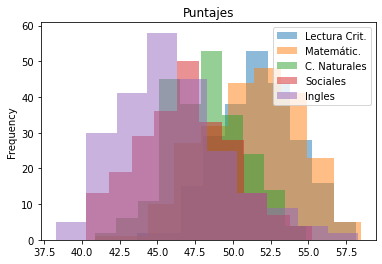

In [102]:
#Histogram of ICFES score indicators
loaded_obj["PUNT_LECTURA_CRITICA_MEAN"].plot.hist(label="Lectura Crit.", alpha=0.5)
loaded_obj["PUNT_MATEMATICAS_MEAN"].plot.hist(label="Matemátic.", alpha=0.5)
loaded_obj["PUNT_C_NATURALES_MEAN"].plot.hist(label="C. Naturales", alpha=0.5)
loaded_obj["PUNT_SOCIALES_CIUDADANAS_MEAN"].plot.hist(label="Sociales", alpha=0.5)
loaded_obj["PUNT_INGLES_MEAN"].plot.hist(label="Ingles", alpha=0.5, title = 'Puntajes')
plt.legend(loc='upper right')
plt.show()

<AxesSubplot:title={'center':'Puntaje Global'}, ylabel='Frequency'>

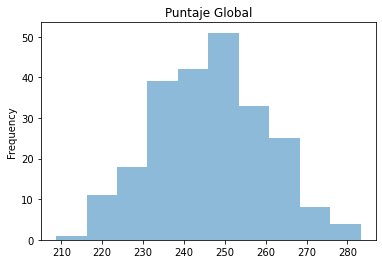

In [103]:
#Overall score histogram
loaded_obj["PUNT_GLOBAL_MEAN"].plot.hist(label="Puntaje Global", alpha=0.5, title = 'Puntaje Global')

#### Some interesting points

* Most the municipalities have access to water and energy close to 100%. More than 60% have sewerage, and natural gas at most in some municipalities. Most municipalities have access to services between 0% and 40%. Internet is the service to which the fewest municipalities have access.

* English has lower overall scores, math and critical reading have the highest scores. Some have Gaussian shapes with what appear to be slight skews to one side.

* The overall score has a fairly clear normal shape and is centered around 245 points.

#### Other visulizations

<span style="color:red"> **[ES/EN]** </span> Para confirmar lo obtenido y tener otro punto de vista gráfico, realizaremos algunas figuras más

**BOX PLOTS**

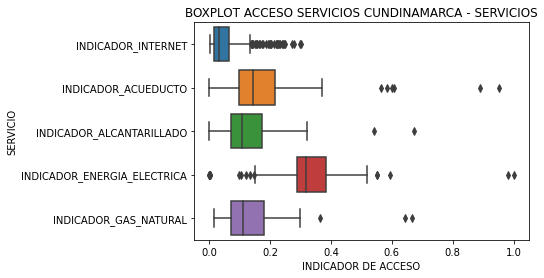

In [104]:
# BOXPLOTS SERVICES
bxp_data = pd.melt(loaded_obj, id_vars=['MUNICIPIO'], value_vars= ['INDICADOR_INTERNET', 'INDICADOR_ACUEDUCTO',
 'INDICADOR_ALCANTARILLADO', 'INDICADOR_ENERGIA_ELECTRICA', 'INDICADOR_GAS_NATURAL']).dropna()

sns.boxplot(y = 'variable', x = 'value', data= bxp_data, orient='h').set(title = 'BOXPLOT ACCESO SERVICIOS CUNDINAMARCA - SERVICIOS',
xlabel = 'INDICADOR DE ACCESO', ylabel = 'SERVICIO')
del bxp_data

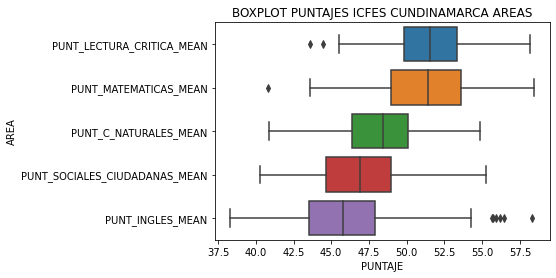

In [105]:
#BOXPLOTS PUNTAJES
bxp_data = pd.melt(loaded_obj, id_vars=['MUNICIPIO'], value_vars= ['PUNT_LECTURA_CRITICA_MEAN',
 'PUNT_MATEMATICAS_MEAN', 'PUNT_C_NATURALES_MEAN', 'PUNT_SOCIALES_CIUDADANAS_MEAN', 'PUNT_INGLES_MEAN']).dropna()

sns.boxplot(y = 'variable', x = 'value', data= bxp_data, orient='h').set(title = 'BOXPLOT PUNTAJES ICFES CUNDINAMARCA AREAS',
xlabel = 'PUNTAJE', ylabel = 'AREA')
del bxp_data

#### Some interesting points

* With the box plots, we confirm the distribution that we have observed in the histograms discussed above. Additionally, we can see that the Internet has much more atypical data, especially for high penetrations. The others have atypical data but in smaller quantities and are similar for all other services.

* With respect to the scores, in English the presence of atypical data above the general distribution is notorious.

#### Correlation matrix (heatmap)

<span style="color:red"> **[ES/EN]** </span> A continuación exploraremos si existe correlación entre variables (las principales)

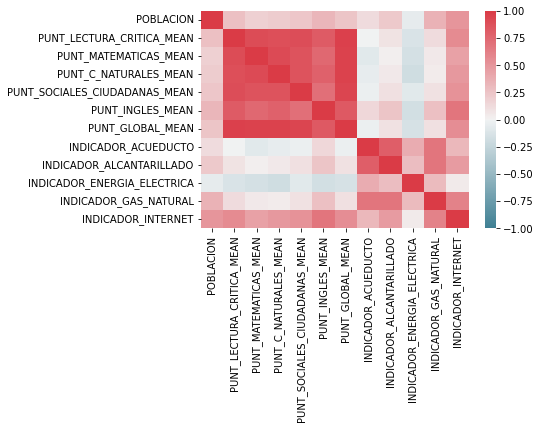

In [106]:
#Correlation of scores and service indicators
df_cor = loaded_obj[[  'POBLACION',
       
       'PUNT_LECTURA_CRITICA_MEAN', 
       
        'PUNT_MATEMATICAS_MEAN',
       
       
       'PUNT_C_NATURALES_MEAN', 
       
       'PUNT_SOCIALES_CIUDADANAS_MEAN', 
       'PUNT_INGLES_MEAN',
       
       'PUNT_GLOBAL_MEAN',
                   'INDICADOR_ACUEDUCTO', 'INDICADOR_ALCANTARILLADO',
                   'INDICADOR_ENERGIA_ELECTRICA', 'INDICADOR_GAS_NATURAL', 
                   'INDICADOR_INTERNET'
       
    ]]
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_cor.corr(),  cmap = cmap, vmax=1, vmin = -1);

#### Some interesting points

There is a correlation between scores that is non interest for project. Electricity and aqueduct show unusual values that would indicate a negative correlation between ICFES score, that means when we have more access to the service we obtain lowest ICFES scores. On the other hand, the indicators of sewerage, natural gas, and internet, the latter being the highest, show positive correlations.




#### PAIR PLOT

<span style="color:red"> **[ES/EN]** </span> Realizamos el siguiente grafico, con el objetivo de determinar si existen diferencias entre los años estudiados, es decir entre 2019 y 2020 respeto a los indicadores (nuestras variables explicativas) y los puntajes ICFES (nuestras variables objetivo).

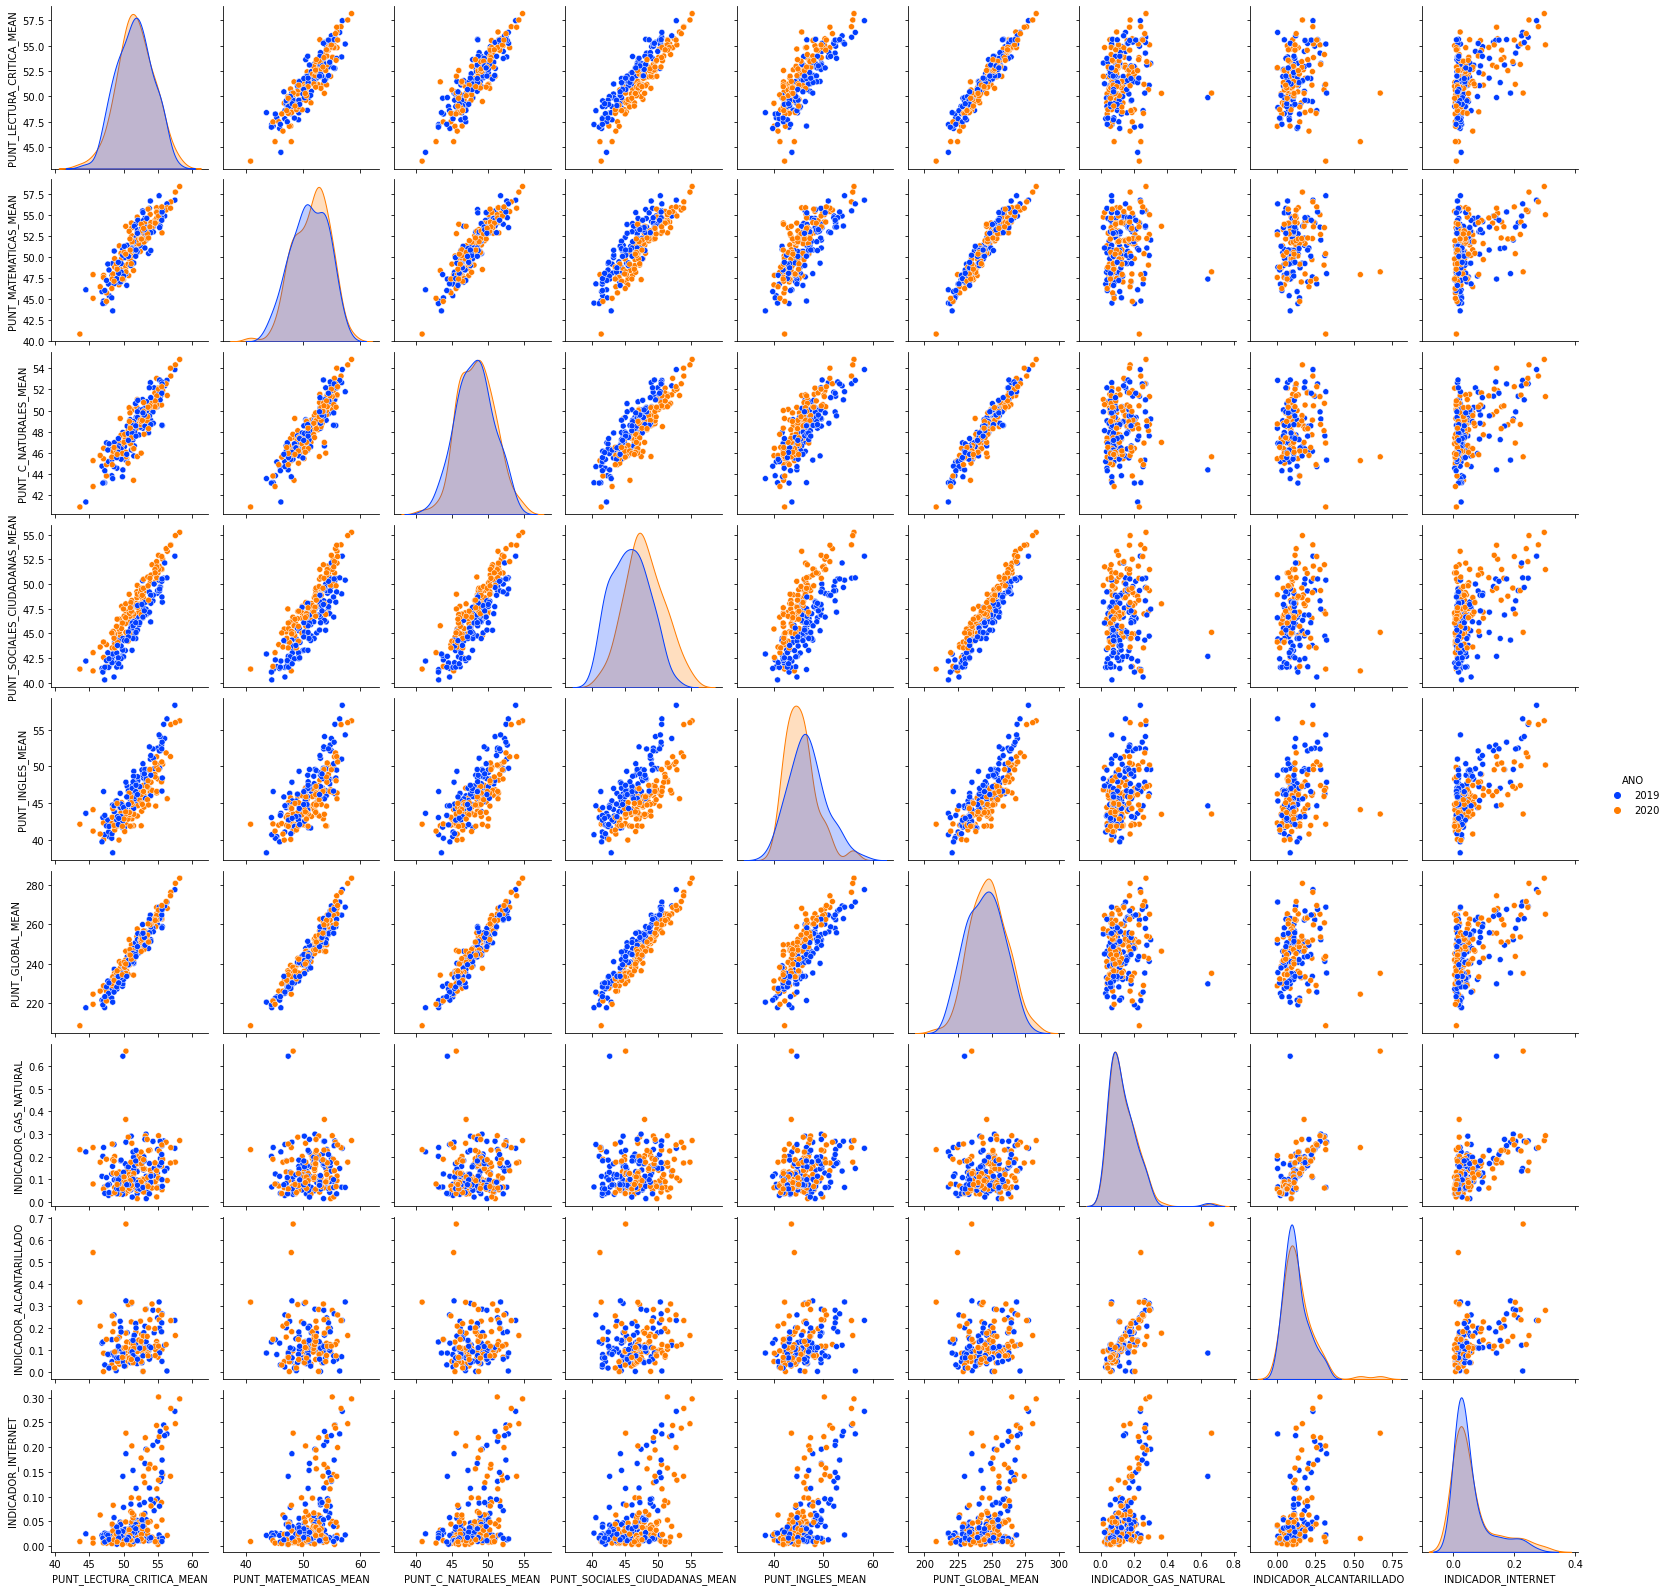

In [107]:
#PAIR PLOT
diffdf = loaded_obj.copy(deep=True)
tempo = diffdf[['ANO', 'PUNT_LECTURA_CRITICA_MEAN',
'PUNT_MATEMATICAS_MEAN','PUNT_C_NATURALES_MEAN','PUNT_SOCIALES_CIUDADANAS_MEAN',
'PUNT_INGLES_MEAN','PUNT_GLOBAL_MEAN','INDICADOR_GAS_NATURAL', 'INDICADOR_ALCANTARILLADO', 'INDICADOR_INTERNET']]
sns.pairplot(tempo, hue= 'ANO', palette='bright')
del diffdf, tempo

#### Some interesting points
The pair plot graph shows that there does not seem to be a difference between the 2019 and 2020 data, among the correlations that were interpreted as positive in the correlation graph there is a higher correlation between gas and the internet, however, is very slight.

### Scatter plots of interensting variables

<AxesSubplot:xlabel='PUNT_GLOBAL_MEAN', ylabel='INDICADOR_ACUEDUCTO'>

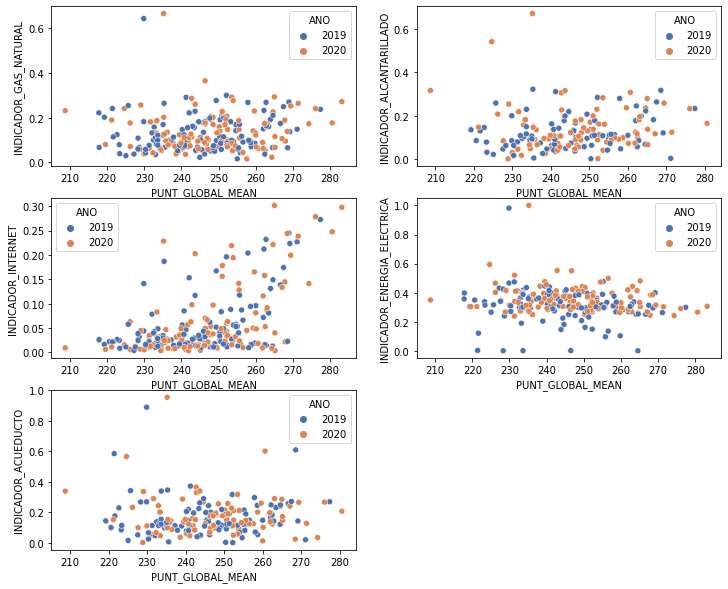

In [4]:
# Scatterplots
plt.figure(figsize=(12,10))
plt.subplot(3,2,1)
sns.scatterplot(x='PUNT_GLOBAL_MEAN', y='INDICADOR_GAS_NATURAL', data=diffdf, hue='ANO', palette="deep")
plt.subplot(3,2,2)
sns.scatterplot(x='PUNT_GLOBAL_MEAN', y='INDICADOR_ALCANTARILLADO', data=diffdf, hue='ANO', palette="deep")
plt.subplot(3,2,3)
sns.scatterplot(x='PUNT_GLOBAL_MEAN', y='INDICADOR_INTERNET', data=diffdf, hue='ANO', palette="deep")
plt.subplot(3,2,4)
sns.scatterplot(x='PUNT_GLOBAL_MEAN', y='INDICADOR_ENERGIA_ELECTRICA', data=diffdf, hue='ANO', palette="deep")
plt.subplot(3,2,5)
sns.scatterplot(x='PUNT_GLOBAL_MEAN', y='INDICADOR_ACUEDUCTO', data=diffdf, hue='ANO', palette="deep")

#### MAP PLOTS

<span style="color:red"> **[ES/EN]** </span> Finalmente exploramos a nivel geografico la distribución de los puntajes, para establecer de manera visual si existe una dependencia del puntaje de acuerdo a la cercania con la ciudad de Bogotá.

In [5]:
with open('cundi.json') as f:
    geo_cundi = json.load(f)

In [6]:
def plot_map_cundi(geo_cundi, df_cundi, score):
    """
    Take a geojson file, df file and score to plot as choropleth style map

    Inputs:

    `geo_cundi`: a geojson object with Cundinamarca municipalities
    `df_cundi`: a dataframe
    `score`: a string with slected score to plot

    Output: a choropleth map
    """
    fig = px.choropleth_mapbox(df_cundi, geojson=geo_cundi, color=score,
    locations= "MUNICIPIO", featureidkey="properties.MPIO_CNMBR",
    center={"lat": 4.8632, "lon": -74.0873},
    mapbox_style="carto-positron", zoom=7, opacity=0.6,
    labels={'INDICADOR_INTERNET':'Internet Access'},
    title="Internet Access",
    color_continuous_scale='rdylgn',
    height=450, width=600)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    return fig.show()

In [7]:

plot_map_cundi(geo_cundi, loaded_obj, 'PUNT_GLOBAL_MEAN')
# plot_map_cundi(geo_cundi, loaded_obj, 'PUNT_LECTURA_CRITICA_MEAN')
# plot_map_cundi(geo_cundi, loaded_obj, 'PUNT_MATEMATICAS_MEAN')
# plot_map_cundi(geo_cundi, loaded_obj, 'PUNT_C_NATURALES_MEAN')
# plot_map_cundi(geo_cundi, loaded_obj, 'PUNT_SOCIALES_CIUDADANAS_MEAN')
# plot_map_cundi(geo_cundi, loaded_obj, 'PUNT_INGLES_MEAN')

#### Some interesting points
<span style="color:red"> **[ES/EN]** </span> Observando los mapas, consideramos que existe cierta relación entre la cercania de los municipios con la capital (Bogotá), aparentemente los municipios más cercanos parecen tener puntajes ICFES mayores en comparación a los municipios más lejanos.

Este hallazgo, ha motivado a incluir la variable `KmDist` en nuestro connunto de datos para su posterior analisis. Esta última contiene el calculo en Kms de la distancia de cada municipio hasta la ciudad de Bogotá. 

### Basic EDA Conclusions

Through EDA we were able to analyze and learn more about the data collected. We started by cleaning and merging data from different sources to arrive at a final data set where we obtained information on public services and ICFES results in a single table. By observing the number of nulls and the data distributions we can conclude that in general the quality of the data is good and does not require major transformations to be able to use it in the future, we could also apply data imputation techniques if required. Considering our initial hypothesis, we can see that for several public services there is no positive correlation between penetration and ICFES scores. However, we can observe a slight positive correlation for natural gas, sewerage, and internet services, the latter being the one that shows the strongest relationship with ICFES test scores in the different competencies and among all municipalities in general. In addition, when looking at the distributions over time we can see that they are consistent, and what was described above is maintained for the two years of study. <span style="color:red"> **[ES/EN]** </span> Finally, la ubicación espacial mostró suficiente fuerza visual para hacernos creer que la cercania a la ciudad capital, puede tener incidencia en los puntajes ICFES, por este motivo, se calculó e incluyó dicha variable.

### Data Sources

* Estadisticas MINTIC - https://colombiatic.mintic.gov.co/679/w3-propertyvalue-36342.html

* Sistema Unico de Información de Servicios Domiciliarios - http://www.sui.gov.co/web/

* DANE - https://www.dane.gov.co

# Extended EDA

## Hypothesis testing

In order to get signals about the direction to this project take away about the model and their viability, we perform statistical test to verify relationship between variables.

### ICFES mean scores

<span style="color:red"> **[ES/EN]** </span> En primer lugar indagaremos nuestra principal hipotesis. ¿Existe relación entre el acceso a los diferentes servicios y el puntaje ICFES en los municipios? Aplicaremos pruebas de independendencia para dar respuesta a esta.

In [116]:
services = ["INDICADOR_INTERNET", "INDICADOR_ACUEDUCTO",
"INDICADOR_ALCANTARILLADO", "INDICADOR_ENERGIA_ELECTRICA", # List of services
"INDICADOR_GAS_NATURAL"]

global_score = "PUNT_GLOBAL_MEAN" # Select global score

def test_global_differences(df, services, global_score):
    """
    Conducts a t-test on PUNT_GLOBAL_MEAN comparing scores
    that are in a higgher or lowest services penetration.
    
    Inputs:
    `df`: A pandas DataFrame

    `services`: A list of services to compare

    `punt_global`: A string with the name of the column
    
    Outputs:
    `result`: A pandas DataFrame in which compile results from t-test
    
    """
    
    result = pd.DataFrame(columns=["Service", "upper_mean", "under_mean", "p-value", "Significant"])
    
    for i in range(0, len(services)):

        under_median = df[df[services[i]] < df[services[i]].median()][global_score].dropna()
        under_median = under_median.astype(float)
        upper_median = df[df[services[i]] > df[services[i]].median()][global_score].dropna()
        upper_median = upper_median.astype(float)

        up_mean = upper_median.mean()
        un_mean = under_median.mean()
        p_value = float(pg.ttest(under_median, upper_median)['p-val'][0])
        sig = p_value < 0.05
        
        result.loc[i] = [services[i], up_mean, un_mean, p_value, sig]
    
    return result

test_global_differences(loaded_obj, services, global_score)

Service  upper_mean  under_mean       p-value  \
0           INDICADOR_INTERNET  251.693440  240.697022  1.647225e-10   
1          INDICADOR_ACUEDUCTO  248.062140  245.035058  1.135173e-01   
2     INDICADOR_ALCANTARILLADO  248.398954  243.518224  1.508314e-02   
3  INDICADOR_ENERGIA_ELECTRICA  243.314144  249.266208  8.246268e-04   
4        INDICADOR_GAS_NATURAL  248.555729  244.609396  2.821308e-02   

   Significant  
0         True  
1        False  
2         True  
3         True  
4         True

<span style="color:red"> **[ES/EN]** </span> Los resultados mostrados en las tablas también puede verse de manera grafica como se muestra acontinuación.

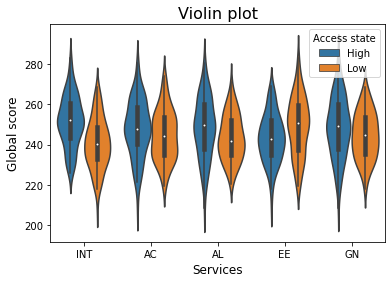

In [117]:
tempo = loaded_obj.copy(deep=True)
tempo['INT'] = tempo['INDICADOR_INTERNET'] > tempo['INDICADOR_INTERNET'].median()
tempo['AC'] = tempo['INDICADOR_ACUEDUCTO'] > tempo['INDICADOR_ACUEDUCTO'].median()
tempo['AL'] = tempo['INDICADOR_ALCANTARILLADO'] > tempo['INDICADOR_ALCANTARILLADO'].median()
tempo['EE'] = tempo['INDICADOR_ENERGIA_ELECTRICA'] > tempo['INDICADOR_ENERGIA_ELECTRICA'].median()
tempo['GN'] = tempo['INDICADOR_GAS_NATURAL'] > tempo['INDICADOR_GAS_NATURAL'].median()

vil_data = pd.melt(tempo, id_vars=['MUNICIPIO', 'PUNT_GLOBAL_MEAN'],
value_vars= ['INT', 'AC', 'AL', 'EE', 'GN']).dropna()

vil_data.columns = ['Municipio', 'Global score', 'Service', 'Access state']
vil_data['Access state'] = vil_data['Access state'].astype(int).astype(str).str.replace('0', 'Low').str.replace('1', 'High')


p = sns.violinplot(x="Service", y="Global score", hue="Access state", data=vil_data)
p.set_xlabel("Services", fontsize=12)
p.set_ylabel("Global score", fontsize=12)
p.set_title("Violin plot", fontsize=16)

#plt.legend(title="Access state", loc="upper right")
plt.show()
del vil_data, tempo

To perform our ttest we first divide the data in two groups for each service, these two groups were related to the ICFES score. Here, we use the median value as cutoff to made the division.

Now, we did same test on an inidividual scores, it means on the specific topics scores.

In [118]:
services = ["INDICADOR_INTERNET", "INDICADOR_ACUEDUCTO",
"INDICADOR_ALCANTARILLADO", "INDICADOR_ENERGIA_ELECTRICA",
"INDICADOR_GAS_NATURAL"]

topics_scores = ['PUNT_LECTURA_CRITICA_MEAN','PUNT_MATEMATICAS_MEAN',
'PUNT_C_NATURALES_MEAN','PUNT_SOCIALES_CIUDADANAS_MEAN', 'PUNT_INGLES_MEAN']

def test_topics_differences(df, services, topics_scores):
    """
    Conducts a t-test on PUNT_GLOBAL_MEAN comparing scores
    that are in a higgher or lowest services penetration.
    
    Inputs:
    `df`: A pandas DataFrame

    `services`: A list of services to compare

    `topics_scores`: A list of topics scores to compare
    
    Outputs:
    `result`: A pandas DataFrame in which compile results from t-test
    
    """
    
    result = pd.DataFrame(columns=["Service", "Topic", "upper_mean", "under_mean", "p-value", "Significant"])
    
    for i in range(0, len(services)):

        for j in range(0, len(topics_scores)):

            under_median = df[df[services[i]] < df[services[i]].median()][topics_scores[j]].dropna()
            under_median = under_median.astype(float)
            upper_median = df[df[services[i]] > df[services[i]].median()][topics_scores[j]].dropna()
            upper_median = upper_median.astype(float)

            up_mean = upper_median.mean()
            un_mean = under_median.mean()
            p_value = float(pg.ttest(under_median, upper_median)['p-val'][0])
            sig = p_value < 0.05

            temp = pd.DataFrame(columns=["Service", "Topic", "upper_mean", "under_mean", "p-value", "Significant"])
            temp.loc[i] = [services[i], topics_scores[j], up_mean, un_mean, p_value, sig]
            result = result.append(temp)
    
    return result

test_topics_differences(loaded_obj, services, topics_scores)

Service                          Topic upper_mean  \
0           INDICADOR_INTERNET      PUNT_LECTURA_CRITICA_MEAN  52.760989   
0           INDICADOR_INTERNET          PUNT_MATEMATICAS_MEAN  52.353413   
0           INDICADOR_INTERNET          PUNT_C_NATURALES_MEAN  49.148152   
0           INDICADOR_INTERNET  PUNT_SOCIALES_CIUDADANAS_MEAN  47.970744   
0           INDICADOR_INTERNET               PUNT_INGLES_MEAN  47.703575   
1          INDICADOR_ACUEDUCTO      PUNT_LECTURA_CRITICA_MEAN  52.038458   
1          INDICADOR_ACUEDUCTO          PUNT_MATEMATICAS_MEAN  51.519649   
1          INDICADOR_ACUEDUCTO          PUNT_C_NATURALES_MEAN   48.54174   
1          INDICADOR_ACUEDUCTO  PUNT_SOCIALES_CIUDADANAS_MEAN  47.251531   
1          INDICADOR_ACUEDUCTO               PUNT_INGLES_MEAN  46.903639   
2     INDICADOR_ALCANTARILLADO      PUNT_LECTURA_CRITICA_MEAN  52.103874   
2     INDICADOR_ALCANTARILLADO          PUNT_MATEMATICAS_MEAN  51.569091   
2     INDICADOR_ALCANTARILLADO          PUNT_C_NATURALES_MEAN  48.609251   
2     INDICADOR_ALCANTARILLADO  PUNT_SOCIALES_CIUDADANAS_MEAN   47.31381   
2     INDICADOR_ALCANTARILLADO               PUNT_INGLES_MEAN  47.047372   
3  INDICADOR_ENERGIA_ELECTRICA      PUNT_LECTURA_CRITICA_MEAN  51.128681   
3  INDICADOR_ENERGIA_ELECTRICA          PUNT_MATEMATICAS_MEAN  50.613618   
3  INDICADOR_ENERGIA_ELECTRICA          PUNT_C_NATURALES_MEAN  47.696583   
3  INDICADOR_ENERGIA_ELECTRICA  PUNT_SOCIALES_CIUDADANAS_MEAN  46.382487   
3  INDICADOR_ENERGIA_ELECTRICA               PUNT_INGLES_MEAN  45.146447   
4        INDICADOR_GAS_NATURAL      PUNT_LECTURA_CRITICA_MEAN  52.125132   
4        INDICADOR_GAS_NATURAL          PUNT_MATEMATICAS_MEAN  51.635082   
4        INDICADOR_GAS_NATURAL          PUNT_C_NATURALES_MEAN  48.597591   
4        INDICADOR_GAS_NATURAL  PUNT_SOCIALES_CIUDADANAS_MEAN  47.317587   
4        INDICADOR_GAS_NATURAL               PUNT_INGLES_MEAN   47.20788   

  under_mean   p-value Significant  
0  50.502955       0.0        True  
0  50.124568       0.0        True  
0  47.394236       0.0        True  
0  45.772919       0.0        True  
0   44.41443       0.0        True  
1  51.398752  0.078924       False  
1   51.14442  0.393072       False  
1   48.11077  0.225869       False  
1  46.578173  0.126191       False  
1  45.392133  0.002275        True  
2  51.133106  0.011171        True  
2   50.81351  0.103971       False  
2   47.88061  0.047232        True  
2   46.24904  0.020622        True  
2  44.914151  0.000046        True  
3   52.16316  0.002534        True  
3  51.913832  0.001428        True  
3  48.884397  0.000304        True  
3  47.392547  0.013214        True  
3  47.023265  0.000042        True  
4  51.289394  0.015296        True  
4   51.00673  0.127693       False  
4  48.067264  0.114167       False  
4  46.578123  0.071963       False  
4   45.15671  0.000006        True

<span style="color:red"> **[ES/EN]** </span> Al igual que con ```PUNT_GLOBAL_MEAN``` veremos los resultados también en formato gráfico.

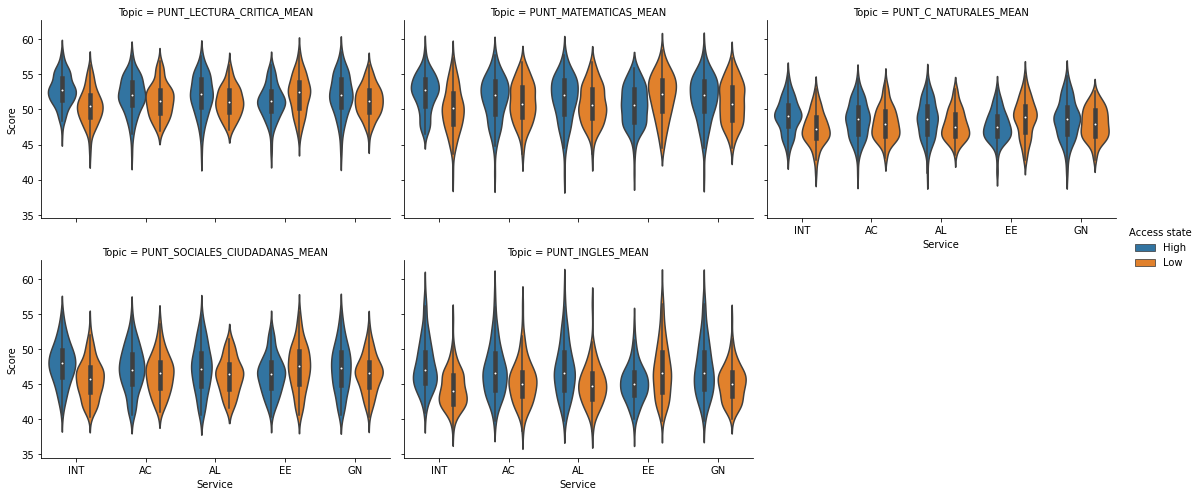

In [119]:
tempo = loaded_obj.copy(deep=True)
tempo['INT'] = tempo['INDICADOR_INTERNET'] > tempo['INDICADOR_INTERNET'].median()
tempo['AC'] = tempo['INDICADOR_ACUEDUCTO'] > tempo['INDICADOR_ACUEDUCTO'].median()
tempo['AL'] = tempo['INDICADOR_ALCANTARILLADO'] > tempo['INDICADOR_ALCANTARILLADO'].median()
tempo['EE'] = tempo['INDICADOR_ENERGIA_ELECTRICA'] > tempo['INDICADOR_ENERGIA_ELECTRICA'].median()
tempo['GN'] = tempo['INDICADOR_GAS_NATURAL'] > tempo['INDICADOR_GAS_NATURAL'].median()

vil_data = pd.melt(tempo, id_vars=['MUNICIPIO', 'PUNT_LECTURA_CRITICA_MEAN',
'PUNT_MATEMATICAS_MEAN', 'PUNT_C_NATURALES_MEAN', 'PUNT_SOCIALES_CIUDADANAS_MEAN',
'PUNT_INGLES_MEAN'], value_vars= ['INT', 'AC', 'AL', 'EE', 'GN']).dropna()
vil_data.columns = ['MUNICIPIO', 'PUNT_LECTURA_CRITICA_MEAN',
'PUNT_MATEMATICAS_MEAN', 'PUNT_C_NATURALES_MEAN', 'PUNT_SOCIALES_CIUDADANAS_MEAN',
'PUNT_INGLES_MEAN', 'variable1', 'value1']

vil_data = pd.melt(vil_data, id_vars=['MUNICIPIO', 'variable1', 'value1'],
value_vars= ['PUNT_LECTURA_CRITICA_MEAN', 'PUNT_MATEMATICAS_MEAN',
'PUNT_C_NATURALES_MEAN', 'PUNT_SOCIALES_CIUDADANAS_MEAN', 'PUNT_INGLES_MEAN'])\
    .dropna()

vil_data.columns = ['Municipio', 'Service', 'Access state', 'Topic', 'Score']
vil_data['Access state'] = vil_data['Access state'].astype(int).astype(str).\
    str.replace('0', 'Low').str.replace('1', 'High')

g = sns.catplot(x="Service", y="Score", hue="Access state", data=vil_data,
height=3.5, aspect=1.5, kind="violin", col="Topic", col_wrap=3)

plt.show()
del vil_data, tempo

#### Some interesting points
The ttest results showns just one service as non-significant in our hypothesis about realationship between high or low acces to public services and global ICFES score.

Similar to shown before, in the specific ICFES topics scores, we found again the ```ALCANTARILLADO``` service isn't significant. In addition, ```GAS NATURAL``` service surprise us beacuse here, in a topic view, is mostly non-significant.

### ICFES Q75 scores

<span style="color:red"> **[ES/EN]** </span> En algunos testeos que decidimos no mostrar aqui, hemos hallado una interesante relación. En los puntajes ICFES más altos es decir Q75 también existe una relación dificil de dejar pasar con el acceso a los diferentes servicios. Por este motivo, hemos conducido sobre estos puntajes nuevas pruebas de independencia. Durante los testeos también hallamos que en los puntajes ICFES más bajos, es decir Q25, esta relación tan directa no se presenta.

In [120]:
services = ["INDICADOR_INTERNET", "INDICADOR_ACUEDUCTO",
"INDICADOR_ALCANTARILLADO", "INDICADOR_ENERGIA_ELECTRICA",
"INDICADOR_GAS_NATURAL"]

global_score = "PUNT_GLOBAL_Q75"

test_global_differences(loaded_obj, services, global_score)

Service  upper_mean  under_mean       p-value  \
0           INDICADOR_INTERNET  281.512931  268.204741  1.696672e-10   
1          INDICADOR_ACUEDUCTO  277.284211  273.400000  9.468756e-02   
2     INDICADOR_ALCANTARILLADO  277.781609  271.413793  8.433532e-03   
3  INDICADOR_ENERGIA_ELECTRICA  270.589130  279.428261  3.415494e-05   
4        INDICADOR_GAS_NATURAL  277.922566  272.814159  1.841144e-02   

   Significant  
0         True  
1        False  
2         True  
3         True  
4         True

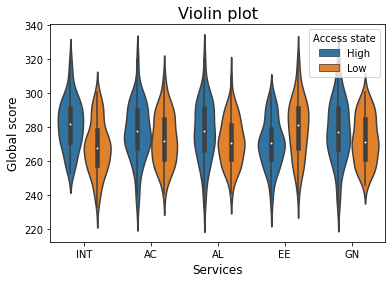

In [121]:
tempo = loaded_obj.copy(deep=True)
tempo['INT'] = tempo['INDICADOR_INTERNET'] > tempo['INDICADOR_INTERNET'].median()
tempo['AC'] = tempo['INDICADOR_ACUEDUCTO'] > tempo['INDICADOR_ACUEDUCTO'].median()
tempo['AL'] = tempo['INDICADOR_ALCANTARILLADO'] > tempo['INDICADOR_ALCANTARILLADO'].median()
tempo['EE'] = tempo['INDICADOR_ENERGIA_ELECTRICA'] > tempo['INDICADOR_ENERGIA_ELECTRICA'].median()
tempo['GN'] = tempo['INDICADOR_GAS_NATURAL'] > tempo['INDICADOR_GAS_NATURAL'].median()

vil_data = pd.melt(tempo, id_vars=['MUNICIPIO', 'PUNT_GLOBAL_Q75'],
value_vars= ['INT', 'AC', 'AL', 'EE', 'GN']).dropna()

vil_data.columns = ['Municipio', 'Global score', 'Service', 'Access state']
vil_data['Access state'] = vil_data['Access state'].astype(int).astype(str).str.replace('0', 'Low').str.replace('1', 'High')


p = sns.violinplot(x="Service", y="Global score", hue="Access state", data=vil_data)
p.set_xlabel("Services", fontsize=12)
p.set_ylabel("Global score", fontsize=12)
p.set_title("Violin plot", fontsize=16)

#plt.legend(title="Access state", loc="upper right")
plt.show()
del vil_data

In [122]:
services = ["INDICADOR_INTERNET", "INDICADOR_ACUEDUCTO",
"INDICADOR_ALCANTARILLADO", "INDICADOR_ENERGIA_ELECTRICA",
"INDICADOR_GAS_NATURAL"]

topics_scores = ['PUNT_LECTURA_CRITICA_Q75', 'PUNT_MATEMATICAS_Q75',
'PUNT_C_NATURALES_Q75', 'PUNT_SOCIALES_CIUDADANAS_Q75', 'PUNT_INGLES_Q75']

test_topics_differences(loaded_obj, services, topics_scores)

Service                         Topic upper_mean  \
0           INDICADOR_INTERNET      PUNT_LECTURA_CRITICA_Q75  59.172414   
0           INDICADOR_INTERNET          PUNT_MATEMATICAS_Q75  59.616379   
0           INDICADOR_INTERNET          PUNT_C_NATURALES_Q75  55.568966   
0           INDICADOR_INTERNET  PUNT_SOCIALES_CIUDADANAS_Q75  55.831897   
0           INDICADOR_INTERNET               PUNT_INGLES_Q75  53.952586   
1          INDICADOR_ACUEDUCTO      PUNT_LECTURA_CRITICA_Q75  58.442105   
1          INDICADOR_ACUEDUCTO          PUNT_MATEMATICAS_Q75  58.594737   
1          INDICADOR_ACUEDUCTO          PUNT_C_NATURALES_Q75  54.778947   
1          INDICADOR_ACUEDUCTO  PUNT_SOCIALES_CIUDADANAS_Q75  54.778947   
1          INDICADOR_ACUEDUCTO               PUNT_INGLES_Q75  52.842105   
2     INDICADOR_ALCANTARILLADO      PUNT_LECTURA_CRITICA_Q75  58.600575   
2     INDICADOR_ALCANTARILLADO          PUNT_MATEMATICAS_Q75  58.721264   
2     INDICADOR_ALCANTARILLADO          PUNT_C_NATURALES_Q75  54.821839   
2     INDICADOR_ALCANTARILLADO  PUNT_SOCIALES_CIUDADANAS_Q75   54.87069   
2     INDICADOR_ALCANTARILLADO               PUNT_INGLES_Q75  53.140805   
3  INDICADOR_ENERGIA_ELECTRICA      PUNT_LECTURA_CRITICA_Q75   57.41087   
3  INDICADOR_ENERGIA_ELECTRICA          PUNT_MATEMATICAS_Q75  57.569565   
3  INDICADOR_ENERGIA_ELECTRICA          PUNT_C_NATURALES_Q75  53.667391   
3  INDICADOR_ENERGIA_ELECTRICA  PUNT_SOCIALES_CIUDADANAS_Q75  53.778261   
3  INDICADOR_ENERGIA_ELECTRICA               PUNT_INGLES_Q75  50.680435   
4        INDICADOR_GAS_NATURAL      PUNT_LECTURA_CRITICA_Q75  58.663717   
4        INDICADOR_GAS_NATURAL          PUNT_MATEMATICAS_Q75  58.865044   
4        INDICADOR_GAS_NATURAL          PUNT_C_NATURALES_Q75  54.973451   
4        INDICADOR_GAS_NATURAL  PUNT_SOCIALES_CIUDADANAS_Q75  54.862832   
4        INDICADOR_GAS_NATURAL               PUNT_INGLES_Q75  53.360619   

  under_mean   p-value Significant  
0  56.907328       0.0        True  
0  57.032328       0.0        True  
0  53.306034       0.0        True  
0  52.980603       0.0        True  
0  49.894397       0.0        True  
1  57.773684  0.092366       False  
1  58.284211  0.528443       False  
1  54.221053  0.202342       False  
1       54.2  0.282112       False  
1  51.197368   0.01266        True  
2  57.454023  0.005558        True  
2  57.821839  0.081224       False  
2  53.899425  0.045395        True  
2  53.864943  0.072236       False  
2  50.497126   0.00015        True  
3  58.715217  0.000361        True  
3  59.154348  0.000448        True  
3  55.271739  0.000055        True  
3  55.084783  0.008444        True  
3  53.252174  0.000021        True  
4  57.617257  0.004287        True  
4  57.951327   0.04882        True  
4  54.070796  0.027257        True  
4  54.221239  0.194561       False  
4  50.787611  0.000022        True

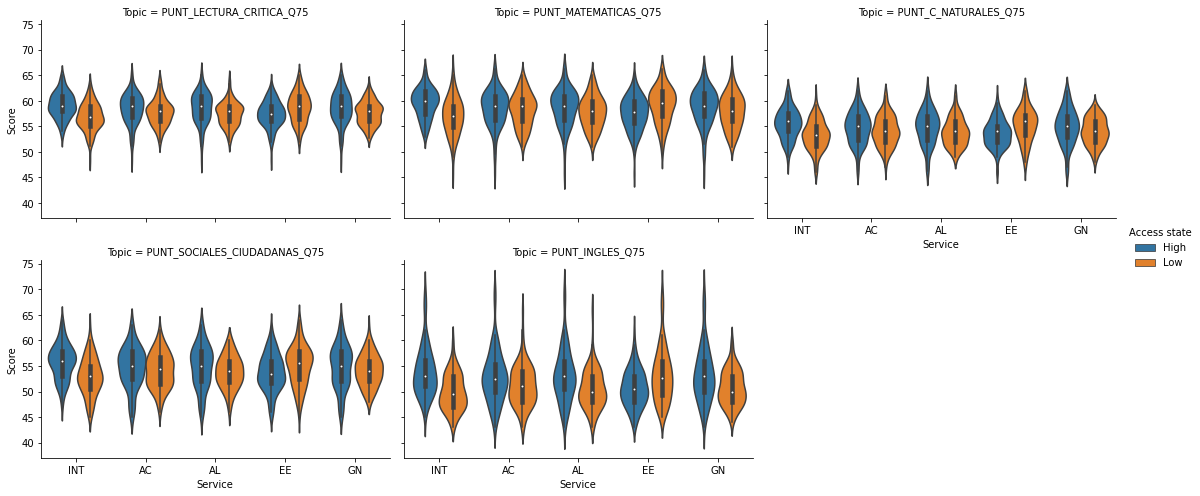

In [123]:
tempo = loaded_obj.copy(deep=True)
tempo['INT'] = tempo['INDICADOR_INTERNET'] > tempo['INDICADOR_INTERNET'].median()
tempo['AC'] = tempo['INDICADOR_ACUEDUCTO'] > tempo['INDICADOR_ACUEDUCTO'].median()
tempo['AL'] = tempo['INDICADOR_ALCANTARILLADO'] > tempo['INDICADOR_ALCANTARILLADO'].median()
tempo['EE'] = tempo['INDICADOR_ENERGIA_ELECTRICA'] > tempo['INDICADOR_ENERGIA_ELECTRICA'].median()
tempo['GN'] = tempo['INDICADOR_GAS_NATURAL'] > tempo['INDICADOR_GAS_NATURAL'].median()

vil_data = pd.melt(tempo, id_vars=['MUNICIPIO', 'PUNT_LECTURA_CRITICA_Q75',
'PUNT_MATEMATICAS_Q75', 'PUNT_C_NATURALES_Q75', 'PUNT_SOCIALES_CIUDADANAS_Q75',
'PUNT_INGLES_Q75'], value_vars= ['INT', 'AC', 'AL', 'EE', 'GN']).dropna()
vil_data.columns = ['MUNICIPIO', 'PUNT_LECTURA_CRITICA_Q75',
'PUNT_MATEMATICAS_Q75', 'PUNT_C_NATURALES_Q75', 'PUNT_SOCIALES_CIUDADANAS_Q75',
'PUNT_INGLES_Q75', 'variable1', 'value1']

vil_data = pd.melt(vil_data, id_vars=['MUNICIPIO', 'variable1', 'value1'],
value_vars= ['PUNT_LECTURA_CRITICA_Q75', 'PUNT_MATEMATICAS_Q75',
'PUNT_C_NATURALES_Q75', 'PUNT_SOCIALES_CIUDADANAS_Q75', 'PUNT_INGLES_Q75'])\
    .dropna()

vil_data.columns = ['Municipio', 'Service', 'Access state', 'Topic', 'Score']
vil_data['Access state'] = vil_data['Access state'].astype(int).astype(str).\
    str.replace('0', 'Low').str.replace('1', 'High')

g = sns.catplot(x="Service", y="Score", hue="Access state", data=vil_data,
height=3.5, aspect=1.5, kind="violin", col="Topic", col_wrap=3)

plt.show()
del vil_data, tempo

#### Some interesting points
The t-test is done for the means of the 75th quartile seeking to determine if there is a statistically significant difference between the highest results of the icfes for the municipalities with high and low access to public services. In the test results we see that for all services with the exception of the ```ACUEDUCTO```, the null hypothesis is rejected, so we have statistical evidence that shows that our hypothesis is apparently correct.

### DISTANCE

<span style="color:red"> **[ES/EN]** </span> Para finalizar nuestras pruebas de hipotesis, aplicaremos la prueba de T una vez más, sobre la variable recien incluida `KmDist`, con el fin de establecer si una cercania a la ciudad capital o no, representa una explicación a los diferentes puntajes. Para esta ocasión únicamente evaluaremos la tabla.

In [124]:
services = ["KmDist"]

topics_scores = ['PUNT_LECTURA_CRITICA_MEAN','PUNT_MATEMATICAS_MEAN',
'PUNT_C_NATURALES_MEAN','PUNT_SOCIALES_CIUDADANAS_MEAN', 'PUNT_INGLES_MEAN',
'PUNT_GLOBAL_MEAN', 'PUNT_LECTURA_CRITICA_Q75', 'PUNT_MATEMATICAS_Q75',
'PUNT_C_NATURALES_Q75', 'PUNT_SOCIALES_CIUDADANAS_Q75', 'PUNT_INGLES_Q75',
'PUNT_GLOBAL_Q75']

test_topics_differences(loaded_obj, services, topics_scores)

Service                          Topic  upper_mean  under_mean   p-value  \
0  KmDist      PUNT_LECTURA_CRITICA_MEAN   50.648015   52.615929       0.0   
0  KmDist          PUNT_MATEMATICAS_MEAN    50.33651   52.141471  0.000008   
0  KmDist          PUNT_C_NATURALES_MEAN   47.489038   49.053349  0.000001   
0  KmDist  PUNT_SOCIALES_CIUDADANAS_MEAN    45.83042   47.913243       0.0   
0  KmDist               PUNT_INGLES_MEAN    44.71594   47.402065       0.0   
0  KmDist               PUNT_GLOBAL_MEAN  241.402171  250.988291       0.0   
0  KmDist       PUNT_LECTURA_CRITICA_Q75   57.025862   59.053879       0.0   
0  KmDist           PUNT_MATEMATICAS_Q75   57.260776   59.387931  0.000002   
0  KmDist           PUNT_C_NATURALES_Q75   53.420259   55.454741       0.0   
0  KmDist   PUNT_SOCIALES_CIUDADANAS_Q75   53.105603   55.706897       0.0   
0  KmDist                PUNT_INGLES_Q75   50.217672    53.62931       0.0   
0  KmDist                PUNT_GLOBAL_Q75  269.094828  280.622845       0.0   

  Significant  
0        True  
0        True  
0        True  
0        True  
0        True  
0        True  
0        True  
0        True  
0        True  
0        True  
0        True  
0        True

#### Some interesting points
<span style="color:red"> **[ES/EN]** </span> Marcando un precedente, la cercania a la ciudad de Bogotá, representa un factor importante para explicar los puntajes ICFES, tanto en su versión promedio o en el grupo de los puntajes más altos (Q75).

De esta forma, finalizamos la exploración de datos y nos llevamos importante contenido de valor para elaborar un modelo predictivo del puntaje ICFES municipal para el departamente de Cundinamarca.
En resumen, todos los indicadores a excepción del `ACUEDUCTO` y sumando la distancia a la ciudad de Bogotá son excelentes factores para el desarrollo de un modelo predictivo.

## References
Chica Gómez, S. M., Galvis Gutiérrez, D. M., & Ramírez Hassan, A. (2010). Determinantes del rendimiento académico en Colombia. Pruebas ICFES-Saber 11o, 2009. Revista Universidad EAFIT, 46(160), 48-72.

